In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/aml')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from keras import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, Input, Bidirectional, RepeatVector, Concatenate, Activation
from keras.layers import BatchNormalization,Dropout
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.metrics import mean_squared_error as mse
import lightgbm as lgb
import time
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline 

In [ ]:
train = pd.read_csv('processed_train.csv')
train.drop(columns = ['Unnamed: 0'], inplace = True)
y = pd.read_csv('label_train.csv')
y = y['revenue']
test = pd.read_csv('processed_test.csv')
test.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
from xgboost import XGBRegressor
k=10
kf = KFold(n_splits=k,
            shuffle=True,
            random_state=int(time.time()))

list_of_train_index = []
list_of_valid_index = []

for train_index, valid_index in kf.split(np.zeros(len(y)), # Placeholder (dummy input)
                                          y): # True input
    
    list_of_train_index.append(train_index)
    list_of_valid_index.append(valid_index)


preds_train = np.zeros([len(train),k])
preds_val = np.zeros([len(list_of_valid_index[0]),k])
preds_test = np.zeros([len(test),k])

log_rmse_train = []
log_rmse_val = []

for j in tqdm(range(k)):   
    x_train = train.loc[list_of_train_index[j], :]
    x_valid = train.loc[list_of_valid_index[j], :]
    
    y_true_train = y[list_of_train_index[j]]
    y_true_valid = y[list_of_valid_index[j]]
    
    xgb = XGBRegressor(learning_rate =0.06, max_depth = 10, max_iter = 100)
    xgb.fit(x_train,y_true_train)
    preds_train[:,j] = xgb.predict(train)
    preds_val[:,j] = xgb.predict(x_valid)
    preds_test[:,j] = xgb.predict(test)
    
    log_rmse_train.append(np.sqrt(mse(preds_train[:,j],y)))
    log_rmse_val.append(np.sqrt(mse(preds_val[:,j],y_true_valid)))
final_preds = preds_test.mean(axis=1)

  0%|          | 0/10 [00:00<?, ?it/s]

[22:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 10%|█         | 1/10 [00:05<00:46,  5.20s/it]

[22:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 20%|██        | 2/10 [00:09<00:38,  4.86s/it]

[22:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 30%|███       | 3/10 [00:14<00:32,  4.71s/it]

[22:53:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 40%|████      | 4/10 [00:18<00:28,  4.67s/it]

[22:53:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 50%|█████     | 5/10 [00:23<00:23,  4.64s/it]

[22:53:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 60%|██████    | 6/10 [00:28<00:18,  4.62s/it]

[22:53:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 70%|███████   | 7/10 [00:34<00:15,  5.12s/it]

[22:53:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 80%|████████  | 8/10 [00:40<00:10,  5.43s/it]

[22:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 90%|█████████ | 9/10 [00:46<00:05,  5.73s/it]

[22:54:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 10/10 [00:52<00:00,  5.27s/it]


In [ ]:
# !pip install shap

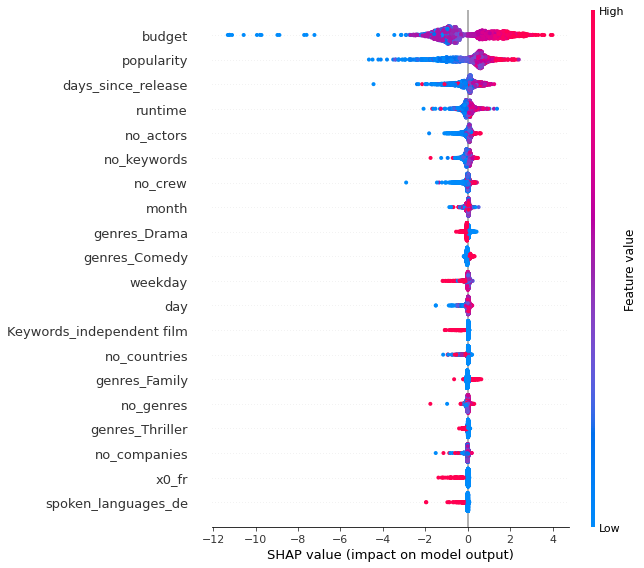

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb)  
shap_values = explainer.shap_values(x_train) 
shap.summary_plot(shap_values, x_train)

In [ ]:
from xgboost import XGBRegressor
k=10
kf = KFold(n_splits=k,
            shuffle=True,
            random_state=int(time.time()))

list_of_train_index = []
list_of_valid_index = []

for train_index, valid_index in kf.split(np.zeros(len(y)), # Placeholder (dummy input)
                                          y): # True input
    
    list_of_train_index.append(train_index)
    list_of_valid_index.append(valid_index)


preds_train = np.zeros([len(train),k])
preds_val = np.zeros([len(list_of_valid_index[0]),k])
preds_test = np.zeros([len(test),k])

log_rmse_train = []
log_rmse_val = []

for j in tqdm(range(k)):   
    x_train = train.loc[list_of_train_index[j], :]
    x_valid = train.loc[list_of_valid_index[j], :]
    
    y_true_train = y[list_of_train_index[j]]
    y_true_valid = y[list_of_valid_index[j]]
    
    hist = HistGradientBoostingRegressor(learning_rate =0.06, max_depth = 10, max_iter = 100)
    hist.fit(x_train,y_true_train)
    preds_train[:,j] = hist.predict(train)
    preds_val[:,j] = hist.predict(x_valid)
    preds_test[:,j] = hist.predict(test)
    
    log_rmse_train.append(np.sqrt(mse(preds_train[:,j],y)))
    log_rmse_val.append(np.sqrt(mse(preds_val[:,j],y_true_valid)))
final_preds = preds_test.mean(axis=1)

100%|██████████| 10/10 [00:40<00:00,  4.07s/it]


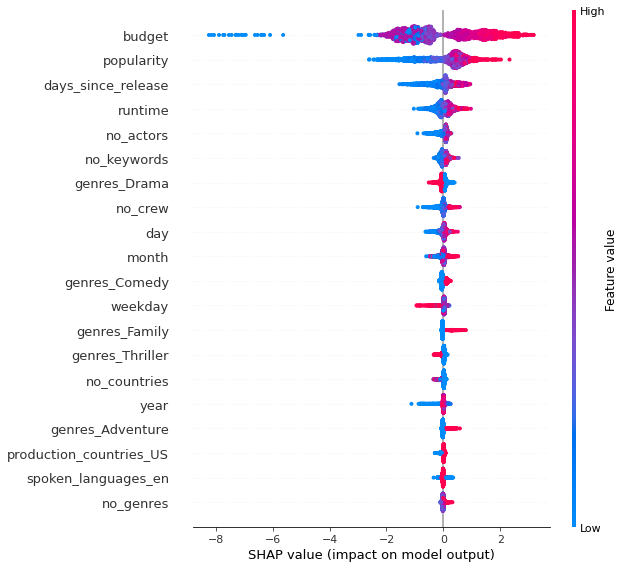

In [ ]:
import shap
explainer = shap.TreeExplainer(hist)  
shap_values = explainer.shap_values(x_train) 
shap.summary_plot(shap_values, x_train)